# Investigating degree distributions

In [13]:
from enum import unique
import importlib
import xgi
import matplotlib.pyplot as plt
import random
import numpy as np
import itertools
from HONG import *
import HONG
importlib.reload(HONG)
import csv
from tqdm import tqdm
import csv
from numpy import genfromtxt
import matplotlib as mpl
import seaborn as sb
import pandas as pd

mpl.style.use('report_style.mplstyle')

update18


In [14]:
props = [0.03]
betas = [0.27]
q_non_committed = 1
q_committed = 1

ensemble_size = 5
run_length = 10**5
social_structures = ['InVS15', 'LyonSchool', 'SFHH', 'Thiers13']

In [15]:
for i in social_structures[1:2]:
    for prop in props:
        for beta in betas:
            print((prop, beta))
            run_ensemble_experiment(prop, beta, beta, ensemble_size, run_length, i, q_non_committed=q_non_committed, q_committed=q_committed)

(0.03, 0.27)


 20%|██        | 1/5 [00:27<01:48, 27.09s/it]

size of largest connected component = 191
sizes of connected components = [191, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1]
number of connected components = 41
number of isolates = 33


 40%|████      | 2/5 [00:54<01:21, 27.25s/it]

size of largest connected component = 194
sizes of connected components = [194, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1]
number of connected components = 39
number of isolates = 31


 60%|██████    | 3/5 [01:22<00:55, 27.65s/it]

size of largest connected component = 192
sizes of connected components = [192, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2]
number of connected components = 43
number of isolates = 35


 80%|████████  | 4/5 [01:52<00:28, 28.67s/it]

size of largest connected component = 193
sizes of connected components = [193, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
number of connected components = 44
number of isolates = 38


100%|██████████| 5/5 [02:21<00:00, 28.36s/it]

size of largest connected component = 182
sizes of connected components = [182, 1, 1, 3, 2, 2, 1, 2, 3, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1]
number of connected components = 45
number of isolates = 30


# Plotting degree distribution before and after interactions

(5, 242)
242
density of singletons with vocab=['B']: 0.16766467065868262
density of singletons with vocab=['A']: 0.20359281437125748
density of singletons with vocab=['A', 'B'] or ['B', 'A']: 0.6287425149700598

168
511
364
density of multitons with vocab=['B']: 0.4899328859060403
density of multitons with vocab=['A']: 0.1610738255033557
density of multitons with vocab=['A', 'B'] or ['B', 'A']: 0.348993288590604
final singleton density: 0.13801652892561983


([<matplotlib.patches.Wedge at 0x7f90b6457410>,
 [Text(0.9621441501041671, 0.5331778637756167, 'A'),
  Text(-0.9138104381858762, 0.61233200395091, 'B'),
  Text(0.5024868618231219, -0.9785228427048348, 'AB')],
 [Text(0.5248059000568184, 0.29082428933215454, '16.1%'),
  Text(-0.498442057192296, 0.33399927488231457, '49.0%'),
  Text(0.2740837428126119, -0.5337397323844553, '34.9%')])

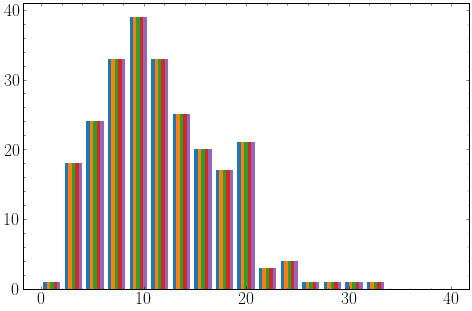

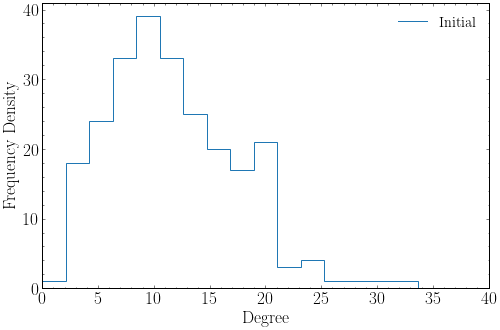

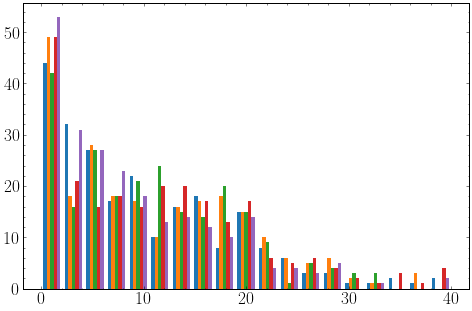

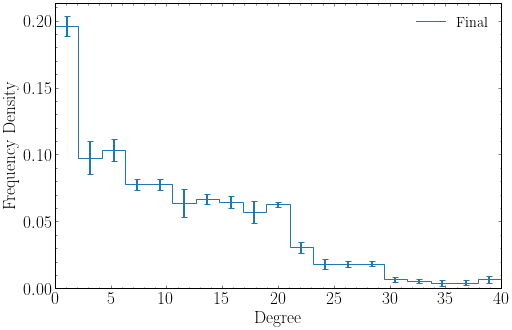

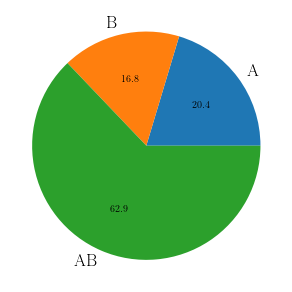

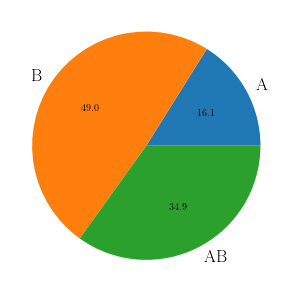

In [21]:
def str_to_list(s): # this never got used in the end, but it converts strings like "['A', 'B']" to lists like ['A', 'B']
    s = s.replace('[', '')
    s = s.replace(']', '')
    s = s.replace("'", '')
    s = s.replace(" ", '')
    l = s.split(',')
    return l
def count_np_occurrences(x, a):
    unique, counts = np.unique(a, return_counts=True)
    d = dict(zip(unique, counts))
    return d[x]

### set params and load data
social_structure = 'LyonSchool'
output_fname = f'{social_structure}_{props[0]}_{betas[0]}_{betas[0]}_{q_non_committed}_{q_committed}_{run_length}_{ensemble_size}'
data = pd.read_csv(f'aux_outputs/{output_fname}.csv', header=None)
###

### split data according to how it is written into the file
initial_deg = data.iloc[0::4].to_numpy(dtype=int)
print(initial_deg.shape)
# rewire_freq = data.iloc[1::4].to_numpy(dtype=np.int64)[:,0]
final_deg = data.iloc[2::4].to_numpy(dtype=int)
final_vocab = data.iloc[3::4].values.tolist()
###

n = initial_deg.shape[1]
print(n)

### count the number of 0 in the 2-d degree array (total singletons over all runs)
total_singletons = count_np_occurrences(0, final_deg)
### find where the singletons are located in the 2-d array
singleton_locs = np.where(final_deg == 0)

### count the number of singletons that have vocab = ['B']
B_counter = 0
A_counter = 0
AB_counter = 0
for i in range(total_singletons):
    loc = (singleton_locs[0][i], singleton_locs[1][i])
    if final_vocab[loc[0]][loc[1]] == "['B']":
        B_counter += 1
    elif final_vocab[loc[0]][loc[1]] == "['A']":
        A_counter += 1
    elif final_vocab[loc[0]][loc[1]] == "['A', 'B']" or final_vocab[loc[0]][loc[1]] == "['B', 'A']":
        AB_counter += 1
###

### find the fraction of singletons which have different vocabs
B_singletons_density = B_counter/total_singletons
A_singletons_density = A_counter/total_singletons
AB_singletons_density = AB_counter/total_singletons
print(f'density of singletons with vocab=[\'B\']: {B_singletons_density}')
print(f'density of singletons with vocab=[\'A\']: {A_singletons_density}')
print(f'density of singletons with vocab=[\'A\', \'B\'] or [\'B\', \'A\']: {AB_singletons_density}')
print()
###

singleton_locs = [(singleton_locs[0][i], singleton_locs[1][i]) for i in range(total_singletons)]

B_counter = 0
A_counter = 0
AB_counter = 0
for i in range(ensemble_size):
    for j in range(n):
        loc = (i, j)
        if loc not in singleton_locs:
            if final_vocab[loc[0]][loc[1]] == "['B']":
                B_counter += 1
            elif final_vocab[loc[0]][loc[1]] == "['A']":
                A_counter += 1
            elif final_vocab[loc[0]][loc[1]] == "['A', 'B']" or final_vocab[loc[0]][loc[1]] == "['B', 'A']":
                AB_counter += 1

print(A_counter)
print(B_counter)
print(AB_counter)
B_multitons_density = B_counter/((n*ensemble_size)-total_singletons)
A_multitons_density = A_counter/((n*ensemble_size)-total_singletons)
AB_multitons_density = AB_counter/((n*ensemble_size)-total_singletons)
print(f'density of multitons with vocab=[\'B\']: {B_multitons_density}')
print(f'density of multitons with vocab=[\'A\']: {A_multitons_density}')
print(f'density of multitons with vocab=[\'A\', \'B\'] or [\'B\', \'A\']: {AB_multitons_density}')
###

### find the average singleton density across all runs
av_final_singletons_density = total_singletons/(ensemble_size*n)
print(f'final singleton density: {av_final_singletons_density}')
###


### plot the initial and final degree distributions in the same bins
bin_num = 19
same_bin_edges = np.linspace(0, 40, num=bin_num+1, endpoint=True)
same_bin_centres = [(same_bin_edges[i]+same_bin_edges[i+1])/2 for i in range(bin_num)]

plt.figure(1)
#initial_bin_edges = np.histogram_bin_edges(initial_deg, bins=20)
initial_deg_binned_freq = plt.hist(initial_deg.T, bins=same_bin_edges, label='Initial', alpha=1)[0]
mean_initial_deg_binned_freq = np.mean(initial_deg_binned_freq, axis=0)
std_initial_deg_binned_freq = np.std(initial_deg_binned_freq, axis=0)

plt.figure(2)
plt.stairs(mean_initial_deg_binned_freq, edges=same_bin_edges, label='Initial')
plt.errorbar(same_bin_centres, mean_initial_deg_binned_freq, yerr=std_initial_deg_binned_freq/np.sqrt(ensemble_size), linestyle='None', color='tab:blue', capsize=3)
plt.legend()
plt.xlim((0, 40))
plt.xlabel('Degree')
plt.ylabel('Frequency Density')
plt.savefig(f'figures/initial_deg_dist_{output_fname}.pdf')


plt.figure(3)
#final_bin_edges = np.histogram_bin_edges(final_deg, bins=20)
final_deg_binned_freq = plt.hist(final_deg.T, bins=same_bin_edges, label='Final', alpha=1)[0]
mean_final_deg_binned_freq = np.mean(final_deg_binned_freq, axis=0)
std_final_deg_binned_freq = np.std(final_deg_binned_freq, axis=0)


plt.figure(4)
plt.stairs(mean_final_deg_binned_freq/n, edges=same_bin_edges, label='Final')
plt.errorbar(same_bin_centres, mean_final_deg_binned_freq/n, yerr=std_final_deg_binned_freq/(n*np.sqrt(ensemble_size)), linestyle='None', color='tab:blue', capsize=3, )
plt.legend()
plt.xlim((0, 40))
plt.xlabel('Degree')
plt.ylabel('Frequency Density')
plt.savefig(f'figures/final_deg_dist_{output_fname}.pdf')
###

plt.figure(5)
plt.pie([A_singletons_density, B_singletons_density, AB_singletons_density], labels=['A', 'B', 'AB'], autopct='%.1f%%')

plt.figure(6)
plt.pie([A_multitons_density, B_multitons_density, AB_multitons_density], labels=['A', 'B', 'AB'], autopct='%.1f%%')
